# LSTM Network for Regression

given the number of passengers (in units of thousands) this month, what is the number of passengers next month?

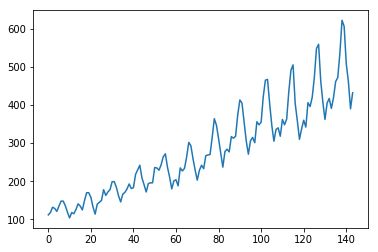

In [7]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

# Solution:
We can write a simple function to convert our single column of data into a two-column dataset: the first column containing this month’s (t) passenger count and the second column containing next month’s (t+1) passenger count, to be predicted.

For example

112,      118

118,      132

...

In [8]:
dataset.shape

(144, 1)

# LSTM Network for Regression

In [40]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)

In [41]:
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset.shape)

(144, 1)


In [42]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [43]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print(len(train), len(test))
print(train.shape,test.shape)

96 48
(96, 1) (48, 1)


In [46]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [47]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print(trainX.shape,trainY.shape,testX.shape,testY.shape)


(94, 1) (94,) (46, 1) (46,)


In [48]:
testX

array([[0.4073359 ],
       [0.3803089 ],
       [0.48648646],
       [0.47104248],
       [0.484556  ],
       [0.6138996 ],
       [0.6969112 ],
       [0.70077217],
       [0.57915056],
       [0.46911195],
       [0.38803086],
       [0.44787642],
       [0.45559844],
       [0.4131274 ],
       [0.4980695 ],
       [0.47104248],
       [0.49999997],
       [0.6389961 ],
       [0.7471043 ],
       [0.7741313 ],
       [0.57915056],
       [0.492278  ],
       [0.3976834 ],
       [0.44980696],
       [0.49420848],
       [0.45945945],
       [0.5830116 ],
       [0.5637065 ],
       [0.61003864],
       [0.71042466],
       [0.8571429 ],
       [0.8783784 ],
       [0.69305015],
       [0.5849421 ],
       [0.4980695 ],
       [0.58108103],
       [0.6042471 ],
       [0.554054  ],
       [0.60810804],
       [0.6891892 ],
       [0.71042466],
       [0.8320464 ],
       [1.        ],
       [0.96911204],
       [0.7799227 ],
       [0.6891892 ]], dtype=float32)

In [49]:
testY

array([0.3803089 , 0.48648646, 0.47104248, 0.484556  , 0.6138996 ,
       0.6969112 , 0.70077217, 0.57915056, 0.46911195, 0.38803086,
       0.44787642, 0.45559844, 0.4131274 , 0.4980695 , 0.47104248,
       0.49999997, 0.6389961 , 0.7471043 , 0.7741313 , 0.57915056,
       0.492278  , 0.3976834 , 0.44980696, 0.49420848, 0.45945945,
       0.5830116 , 0.5637065 , 0.61003864, 0.71042466, 0.8571429 ,
       0.8783784 , 0.69305015, 0.5849421 , 0.4980695 , 0.58108103,
       0.6042471 , 0.554054  , 0.60810804, 0.6891892 , 0.71042466,
       0.8320464 , 1.        , 0.96911204, 0.7799227 , 0.6891892 ,
       0.55212355], dtype=float32)

In [32]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(trainX.shape,testX.shape)

(94, 1, 1) (46, 1, 1)


# Build models

In [33]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 0s - loss: 0.0413
Epoch 2/100
 - 0s - loss: 0.0202
Epoch 3/100
 - 0s - loss: 0.0146
Epoch 4/100
 - 0s - loss: 0.0131
Epoch 5/100
 - 0s - loss: 0.0121
Epoch 6/100
 - 0s - loss: 0.0111
Epoch 7/100
 - 0s - loss: 0.0102
Epoch 8/100
 - 0s - loss: 0.0093
Epoch 9/100
 - 0s - loss: 0.0081
Epoch 10/100
 - 0s - loss: 0.0071
Epoch 11/100
 - 0s - loss: 0.0062
Epoch 12/100
 - 0s - loss: 0.0053
Epoch 13/100
 - 0s - loss: 0.0045
Epoch 14/100
 - 0s - loss: 0.0038
Epoch 15/100
 - 0s - loss: 0.0033
Epoch 16/100
 - 0s - loss: 0.0029
Epoch 17/100
 - 0s - loss: 0.0026
Epoch 18/100
 - 0s - loss: 0.0024
Epoch 19/100
 - 0s - loss: 0.0022
Epoch 20/100
 - 0s - loss: 0.0022
Epoch 21/100
 - 0s - loss: 0.0021
Epoch 22/100
 - 0s - loss: 0.0021
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0021
Epoch 25/100
 - 0s - loss: 0.0020
Epoch 26/100
 - 0s - loss: 0.0021
Epoch

# Prediction

In [34]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.92 RMSE
Test Score: 47.53 RMSE


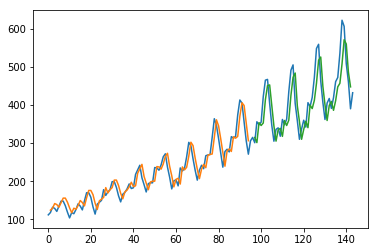

In [35]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM for Regression Using the Window Method

In [50]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [54]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print(trainX.shape,testX.shape)


(92, 3) (44, 3)


In [55]:
testX

array([[0.4073359 , 0.3803089 , 0.48648646],
       [0.3803089 , 0.48648646, 0.47104248],
       [0.48648646, 0.47104248, 0.484556  ],
       [0.47104248, 0.484556  , 0.6138996 ],
       [0.484556  , 0.6138996 , 0.6969112 ],
       [0.6138996 , 0.6969112 , 0.70077217],
       [0.6969112 , 0.70077217, 0.57915056],
       [0.70077217, 0.57915056, 0.46911195],
       [0.57915056, 0.46911195, 0.38803086],
       [0.46911195, 0.38803086, 0.44787642],
       [0.38803086, 0.44787642, 0.45559844],
       [0.44787642, 0.45559844, 0.4131274 ],
       [0.45559844, 0.4131274 , 0.4980695 ],
       [0.4131274 , 0.4980695 , 0.47104248],
       [0.4980695 , 0.47104248, 0.49999997],
       [0.47104248, 0.49999997, 0.6389961 ],
       [0.49999997, 0.6389961 , 0.7471043 ],
       [0.6389961 , 0.7471043 , 0.7741313 ],
       [0.7471043 , 0.7741313 , 0.57915056],
       [0.7741313 , 0.57915056, 0.492278  ],
       [0.57915056, 0.492278  , 0.3976834 ],
       [0.492278  , 0.3976834 , 0.44980696],
       [0.

In [56]:
testY

array([0.47104248, 0.484556  , 0.6138996 , 0.6969112 , 0.70077217,
       0.57915056, 0.46911195, 0.38803086, 0.44787642, 0.45559844,
       0.4131274 , 0.4980695 , 0.47104248, 0.49999997, 0.6389961 ,
       0.7471043 , 0.7741313 , 0.57915056, 0.492278  , 0.3976834 ,
       0.44980696, 0.49420848, 0.45945945, 0.5830116 , 0.5637065 ,
       0.61003864, 0.71042466, 0.8571429 , 0.8783784 , 0.69305015,
       0.5849421 , 0.4980695 , 0.58108103, 0.6042471 , 0.554054  ,
       0.60810804, 0.6891892 , 0.71042466, 0.8320464 , 1.        ,
       0.96911204, 0.7799227 , 0.6891892 , 0.55212355], dtype=float32)

In [64]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape,testX.shape)

(92, 1, 3) (44, 1, 3)


In [63]:
testX.shape[1]

3

In [58]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 0s - loss: 0.0542
Epoch 2/100
 - 0s - loss: 0.0259
Epoch 3/100
 - 0s - loss: 0.0167
Epoch 4/100
 - 0s - loss: 0.0145
Epoch 5/100
 - 0s - loss: 0.0129
Epoch 6/100
 - 0s - loss: 0.0116
Epoch 7/100
 - 0s - loss: 0.0105
Epoch 8/100
 - 0s - loss: 0.0094
Epoch 9/100
 - 0s - loss: 0.0081
Epoch 10/100
 - 0s - loss: 0.0074
Epoch 11/100
 - 0s - loss: 0.0066
Epoch 12/100
 - 0s - loss: 0.0060
Epoch 13/100
 - 0s - loss: 0.0056
Epoch 14/100
 - 0s - loss: 0.0052
Epoch 15/100
 - 0s - loss: 0.0050
Epoch 16/100
 - 0s - loss: 0.0049
Epoch 17/100
 - 0s - loss: 0.0046
Epoch 18/100
 - 0s - loss: 0.0045
Epoch 19/100
 - 0s - loss: 0.0045
Epoch 20/100
 - 0s - loss: 0.0043
Epoch 21/100
 - 0s - loss: 0.0043
Epoch 22/100
 - 0s - loss: 0.0042
Epoch 23/100
 - 0s - loss: 0.0042
Epoch 24/100
 - 0s - loss: 0.0042
Epoch 25/100
 - 0s - loss: 0.0040
Epoch 26/100
 - 0s - loss: 0.0041
Epoch 27/100
 - 0s - loss: 0.0040
Epoch 28/100
 - 0s - loss: 0.0040
Epoch 29/100
 - 0s - loss: 0.0039
Epoch 30/100
 - 0s - lo

In [45]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 24.33 RMSE
Test Score: 56.27 RMSE


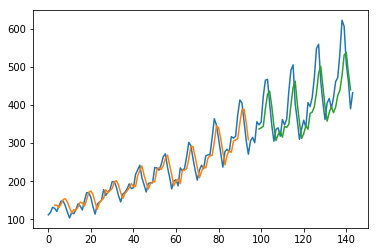

In [46]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM for Regression with Time Steps

In [66]:
# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [60]:
testX

array([[0.4073359 , 0.3803089 , 0.48648646],
       [0.3803089 , 0.48648646, 0.47104248],
       [0.48648646, 0.47104248, 0.484556  ],
       [0.47104248, 0.484556  , 0.6138996 ],
       [0.484556  , 0.6138996 , 0.6969112 ],
       [0.6138996 , 0.6969112 , 0.70077217],
       [0.6969112 , 0.70077217, 0.57915056],
       [0.70077217, 0.57915056, 0.46911195],
       [0.57915056, 0.46911195, 0.38803086],
       [0.46911195, 0.38803086, 0.44787642],
       [0.38803086, 0.44787642, 0.45559844],
       [0.44787642, 0.45559844, 0.4131274 ],
       [0.45559844, 0.4131274 , 0.4980695 ],
       [0.4131274 , 0.4980695 , 0.47104248],
       [0.4980695 , 0.47104248, 0.49999997],
       [0.47104248, 0.49999997, 0.6389961 ],
       [0.49999997, 0.6389961 , 0.7471043 ],
       [0.6389961 , 0.7471043 , 0.7741313 ],
       [0.7471043 , 0.7741313 , 0.57915056],
       [0.7741313 , 0.57915056, 0.492278  ],
       [0.57915056, 0.492278  , 0.3976834 ],
       [0.492278  , 0.3976834 , 0.44980696],
       [0.

In [61]:
testY

array([0.47104248, 0.484556  , 0.6138996 , 0.6969112 , 0.70077217,
       0.57915056, 0.46911195, 0.38803086, 0.44787642, 0.45559844,
       0.4131274 , 0.4980695 , 0.47104248, 0.49999997, 0.6389961 ,
       0.7471043 , 0.7741313 , 0.57915056, 0.492278  , 0.3976834 ,
       0.44980696, 0.49420848, 0.45945945, 0.5830116 , 0.5637065 ,
       0.61003864, 0.71042466, 0.8571429 , 0.8783784 , 0.69305015,
       0.5849421 , 0.4980695 , 0.58108103, 0.6042471 , 0.554054  ,
       0.60810804, 0.6891892 , 0.71042466, 0.8320464 , 1.        ,
       0.96911204, 0.7799227 , 0.6891892 , 0.55212355], dtype=float32)

In [48]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

print(trainX.shape,testX.shape)


(92, 3, 1) (44, 3, 1)


In [49]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0286
Epoch 2/100
 - 0s - loss: 0.0117
Epoch 3/100
 - 0s - loss: 0.0097
Epoch 4/100
 - 0s - loss: 0.0086
Epoch 5/100
 - 0s - loss: 0.0074
Epoch 6/100
 - 0s - loss: 0.0065
Epoch 7/100
 - 0s - loss: 0.0058
Epoch 8/100
 - 0s - loss: 0.0053
Epoch 9/100
 - 0s - loss: 0.0045
Epoch 10/100
 - 0s - loss: 0.0044
Epoch 11/100
 - 0s - loss: 0.0041
Epoch 12/100
 - 0s - loss: 0.0041
Epoch 13/100
 - 0s - loss: 0.0040
Epoch 14/100
 - 0s - loss: 0.0039
Epoch 15/100
 - 0s - loss: 0.0039
Epoch 16/100
 - 0s - loss: 0.0039
Epoch 17/100
 - 0s - loss: 0.0038
Epoch 18/100
 - 0s - loss: 0.0039
Epoch 19/100
 - 0s - loss: 0.0038
Epoch 20/100
 - 0s - loss: 0.0038
Epoch 21/100
 - 0s - loss: 0.0038
Epoch 22/100
 - 0s - loss: 0.0038
Epoch 23/100
 - 0s - loss: 0.0037
Epoch 24/100
 - 0s - loss: 0.0038
Epoch 25/100
 - 0s - loss: 0.0037
Epoch 26/100
 - 0s - loss: 0.0038
Epoch 27/100
 - 0s - loss: 0.0037
Epoch 28/100
 - 0s - loss: 0.0038
Epoch 29/100
 - 0s - loss: 0.0037
Epoch 30/100
 - 0s - lo

In [50]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.70 RMSE
Test Score: 58.86 RMSE


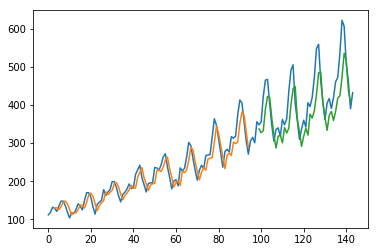

In [51]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM with Memory Between Batches

In [73]:
# LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

print(trainX.shape,testX.shape)

(92, 3, 1) (44, 3, 1)


In [74]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

Epoch 1/1
 - 0s - loss: 0.0048
Epoch 1/1
 - 0s - loss: 0.0082
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0048
Epoch 1/1
 - 0s - loss: 0.0047
Epoch 1/1
 - 0s - loss: 0.0047
Epoch 1/1
 - 0s - loss: 0.0047
Epoch 1/1
 - 0s - loss: 0.0046
Epoch 1/1
 - 0s - loss: 0.0045
Epoch 1/1
 - 0s - loss: 0.0045
Epoch 1/1
 - 0s - loss: 0.0044
Epoch 1/1
 - 0s - loss: 0.0043
Epoch 1/1
 - 0s - loss: 0.0043
Epoch 1/1
 - 0s - loss: 0.0042
Epoch 1/1
 - 0s - loss: 0.0042
Epoch 1/1
 - 0s - loss: 0.0041
Epoch 1/1
 - 0s - loss: 0.0041
Epoch 1/1
 - 0s - loss: 0.0040
Epoch 1/1
 - 0s - loss: 0.0040
Epoch 1/1
 - 0s - loss: 0.0039
Epoch 1/1
 - 0s - loss: 0.0038
Epoch 1/1
 - 0s - loss: 0.0037
Epoch 1/1
 - 0s - loss: 0.0037
Epoch 1/1
 - 0s - loss: 0.0036
Epoch 1/1
 - 0s - loss: 0.0035
Epoch 1/1
 - 0s - loss: 0.0034
Epoch 1/1
 - 0s - loss: 0.0033
Epoch 1/1
 - 0s - loss: 0.0032
Epoch 1/1
 - 0s - loss: 0.0032
Epoch 1/1
 - 0s - loss: 0.0031
Epoch 1/1
 - 0s - loss: 0.0030
Epoch 1/1
 - 0s - loss: 0.0029
Epoch 1/

In [56]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

print(trainPredict.shape,testPredict.shape)

(92, 1) (44, 1)


In [58]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.95 RMSE
Test Score: 55.43 RMSE


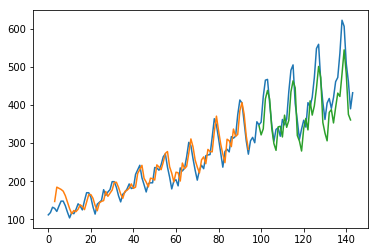

In [59]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Stacked LSTMs with Memory Between Batches

In [70]:
# Stacked LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print(trainX.shape,testX.shape)

(92, 3, 1) (44, 3, 1)


In [71]:
testX

array([[[0.4073359 ],
        [0.3803089 ],
        [0.48648646]],

       [[0.3803089 ],
        [0.48648646],
        [0.47104248]],

       [[0.48648646],
        [0.47104248],
        [0.484556  ]],

       [[0.47104248],
        [0.484556  ],
        [0.6138996 ]],

       [[0.484556  ],
        [0.6138996 ],
        [0.6969112 ]],

       [[0.6138996 ],
        [0.6969112 ],
        [0.70077217]],

       [[0.6969112 ],
        [0.70077217],
        [0.57915056]],

       [[0.70077217],
        [0.57915056],
        [0.46911195]],

       [[0.57915056],
        [0.46911195],
        [0.38803086]],

       [[0.46911195],
        [0.38803086],
        [0.44787642]],

       [[0.38803086],
        [0.44787642],
        [0.45559844]],

       [[0.44787642],
        [0.45559844],
        [0.4131274 ]],

       [[0.45559844],
        [0.4131274 ],
        [0.4980695 ]],

       [[0.4131274 ],
        [0.4980695 ],
        [0.47104248]],

       [[0.4980695 ],
        [0.47104248],
    

In [72]:
testY

array([0.47104248, 0.484556  , 0.6138996 , 0.6969112 , 0.70077217,
       0.57915056, 0.46911195, 0.38803086, 0.44787642, 0.45559844,
       0.4131274 , 0.4980695 , 0.47104248, 0.49999997, 0.6389961 ,
       0.7471043 , 0.7741313 , 0.57915056, 0.492278  , 0.3976834 ,
       0.44980696, 0.49420848, 0.45945945, 0.5830116 , 0.5637065 ,
       0.61003864, 0.71042466, 0.8571429 , 0.8783784 , 0.69305015,
       0.5849421 , 0.4980695 , 0.58108103, 0.6042471 , 0.554054  ,
       0.60810804, 0.6891892 , 0.71042466, 0.8320464 , 1.        ,
       0.96911204, 0.7799227 , 0.6891892 , 0.55212355], dtype=float32)

In [75]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()

model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()


Epoch 1/1
 - 1s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0219
Epoch 1/1
 - 0s - loss: 0.0153
Epoch 1/1
 - 0s - loss: 0.0112
Epoch 1/1
 - 0s - loss: 0.0086
Epoch 1/1
 - 0s - loss: 0.0074
Epoch 1/1
 - 0s - loss: 0.0069
Epoch 1/1
 - 0s - loss: 0.0066
Epoch 1/1
 - 0s - loss: 0.0064
Epoch 1/1
 - 0s - loss: 0.0063
Epoch 1/1
 - 0s - loss: 0.0062
Epoch 1/1
 - 0s - loss: 0.0061
Epoch 1/1
 - 0s - loss: 0.0061
Epoch 1/1
 - 0s - loss: 0.0060
Epoch 1/1
 - 0s - loss: 0.0059
Epoch 1/1
 - 0s - loss: 0.0059
Epoch 1/1
 - 0s - loss: 0.0059
Epoch 1/1
 - 0s - loss: 0.0058
Epoch 1/1
 - 0s - loss: 0.0058
Epoch 1/1
 - 0s - loss: 0.0058
Epoch 1/1
 - 0s - loss: 0.0058
Epoch 1/1
 - 0s - loss: 0.0058
Epoch 1/1
 - 0s - loss: 0.0059
Epoch 1/1
 - 0s - loss: 0.0059
Epoch 1/1
 - 0s - loss: 0.0059
Epoch 1/1
 - 0s - loss: 0.0059
Epoch 1/1
 - 0s - loss: 0.0060
Epoch 1/1
 - 0s - loss: 0.0060
Epoch 1/1
 - 0s - loss: 0.0061
Epoch 1/1
 - 0s - loss: 0.0061
Epoch 1/1
 - 0s - loss: 0.0061
Epoch 1/1
 - 0s - loss: 0.0062
Epoch 1/

Epoch 1/1
 - 1s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0142
Epoch 1/1
 - 0s - loss: 0.0100
Epoch 1/1
 - 0s - loss: 0.0072
Epoch 1/1
 - 0s - loss: 0.0060
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/

In [63]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 29.86 RMSE
Test Score: 79.31 RMSE


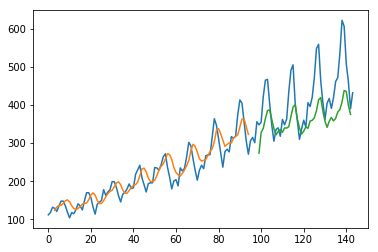

In [64]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()